<a href="https://colab.research.google.com/github/shkim0116/7th_EDA/blob/main/B%EC%A1%B0/EDA_B%EC%A1%B0_%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

######  목표 : 소비자의 등급을 올리기 (많이 소비하게 만들기, 매출 올리기)

#### Data 정리

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
marketing = pd.read_csv('marketing_campaign.csv', sep=';')

In [ ]:
# campaign 총 횟수를 campaign이라는 칼럼에 저장 
marketing['campaign']= marketing['AcceptedCmp3']+marketing['AcceptedCmp4']+marketing['AcceptedCmp5']+marketing['AcceptedCmp1']+marketing['AcceptedCmp2']+marketing['Response']

In [ ]:
# company에 enrol한 연도, 월 따로 저장
marketing.Dt_Customer = pd.to_datetime(marketing.Dt_Customer)
marketing["enrol_year"] = marketing.Dt_Customer.dt.strftime("%Y")
marketing["enrol_month"] = marketing.Dt_Customer.dt.strftime("%m")

In [ ]:
from datetime import datetime
# 현재까지의 회원 일 수 따로 저장
y = pd.to_datetime(datetime.today().strftime("%Y-%m-%d"))

In [ ]:
marketing['days'] = y - marketing.Dt_Customer

In [ ]:
# 나이를 age에 저장
marketing['age'] = 2022-marketing['Year_Birth']

In [ ]:
marketing['children'] = marketing['Kidhome']+marketing['Teenhome']

In [ ]:
# Mnt 항목들을 묶어서 spent에 저장
marketing['spent'] = marketing.iloc[:,9:15].sum(axis=1)

In [ ]:
marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,campaign,enrol_year,enrol_month,days,age,children,spent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,1,2012,09,3431 days,65,0,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,0,2014,03,2881 days,68,2,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,0,2013,08,3080 days,57,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,0,2014,02,2907 days,38,1,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,0,2014,01,2929 days,41,1,422


count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: spent, dtype: float64


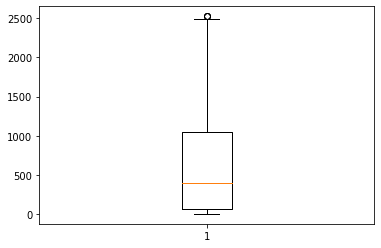

In [ ]:
plt.boxplot(x=marketing.spent)
print(marketing.spent.describe())

## 소비자 등급제 소개

+ 기업의 가장 중요한 부분은 매출이라고 생각하여, 소비자의 소비 금액에 따라 3개의 등급으로 나눔
* 1st grade: spent 3분위 수 이상
* 2nd grade: spent 1분위~3분위
* 3rd grade: spent 1분위 이하

In [ ]:
ss = [68.75, 1045.5]
g1 = marketing[marketing['spent']>=ss[1]]
d2 = marketing[marketing['spent']<ss[1]]
g2 = d2[d2['spent']>=ss[0]]
g3 = marketing[marketing['spent']<ss[0]]


In [ ]:
# grade 추가
g1['grade']=1
g2['grade']=2
g3['grade']=3

<ipython-input-13-548dd7d1a280>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g1['grade']=1
<ipython-input-13-548dd7d1a280>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g2['grade']=2
<ipython-input-13-548dd7d1a280>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [ ]:
eda = pd.concat([g1, g2, g3])

In [ ]:
eda.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,campaign,enrol_year,enrol_month,days,age,children,spent,grade
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,11,1,1,2012,09,3431 days,65,0,1617,1
12,2125,1959,Graduation,Divorced,63033.0,0,0,2013-11-15,82,194,...,11,0,0,2013,11,2994 days,63,0,1102,1
15,2114,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,...,11,1,3,2012,11,3350 days,76,0,1315,1
18,6565,1949,Master,Married,76995.0,0,1,2013-03-28,91,1012,...,11,0,1,2013,03,3226 days,73,1,1782,1
21,5376,1979,Graduation,Married,2447.0,1,0,2013-01-06,42,1,...,11,0,0,2013,01,3307 days,43,1,1730,1


## customer의 제품군 별 소비 특징 (예진)

In [ ]:
cc=['#be4449','#f1e7e0','#eda3ad','#466d89','#7e997d','#f0af31']
c1 = ['#f6958e','#bce6f4','#88a7cc']
c2=['#d1ecf3','#fbced7','#75cada','#80c2b8','#fa9da7','#ccabd6']
c3=['#cb7da4','#be9fdb','#efd7ed','#9fbecb','#fce3d8']


In [ ]:
pal = sns.color_palette(c2)

In [ ]:
products = eda.groupby('grade').median().iloc[:, 6:12]
labels = pd.Series(products.columns).str.replace('Mnt', '')
labels = labels.str.replace('Products', '')
labels = labels.str.replace('Prods', '')

products 

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
grade,,,,,,
1,736.5,50.0,420.0,76.0,50.0,56.5
2,179.0,8.0,68.0,13.0,9.0,30.0
3,11.0,1.0,8.0,2.0,1.0,5.0


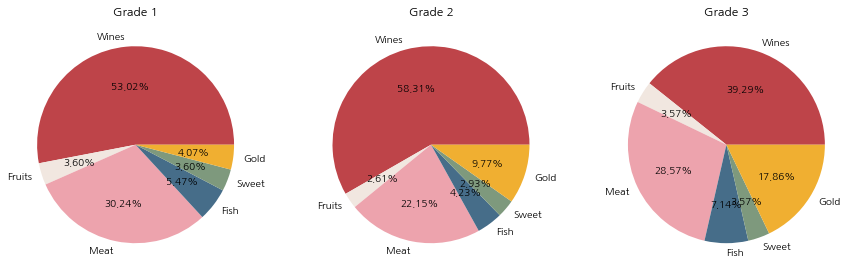

In [ ]:
plt.figure(figsize=(15,10))
plt.rcParams['font.family'] = 'NanumGothic'
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.title(f'Grade {i+1}')
    plt.pie(products.iloc[i, :], autopct='%1.2f%%', labels=labels, colors=cc)
    
plt.show() 

> Grade가 증가할 수록 Wine의 소비량이 다른 제품군에 비해 상대적으로 더 증가하는 것으로 보아 해당 쇼핑몰은 wine에 대한 소비자들의 만족도, 충성도가 높지 않을까 생각합니다. 즉 grade를 올리기 위해선 소비자들이 wine 제품들을 더 잘 접하도록 해야하지 않을까 생각합니다.

* 3 grade의 고객들이 고기, 금, 물고기 등을 더 많이 샀으므로 이것들을 더욱 많이 살 수 있는 전략을 제시하면 어떨까

In [ ]:
# 각 물품별 소비량을 5개의 등급으로 나눈것
eda_temp = eda.copy()
name = eda_temp.columns[9:15]
name

Index(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds'],
      dtype='object')

In [ ]:
for col in name:
    eda_temp[col] = pd.qcut(eda[col], [0, .2, .4, .6, .8, 1], labels=['5th', '4th', '3rd', '2nd', '1st'])
eda_temp[name]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1st,1st,1st,1st,1st,1st
12,3rd,1st,1st,1st,1st,3rd
15,1st,2nd,2nd,2nd,1st,2nd
18,1st,1st,1st,5th,2nd,1st
21,5th,5th,1st,5th,5th,5th
...,...,...,...,...,...,...
2223,4th,3rd,5th,5th,4th,5th
2229,5th,4th,5th,3rd,5th,4th
2232,5th,5th,5th,4th,4th,5th
2233,5th,3rd,4th,3rd,5th,4th


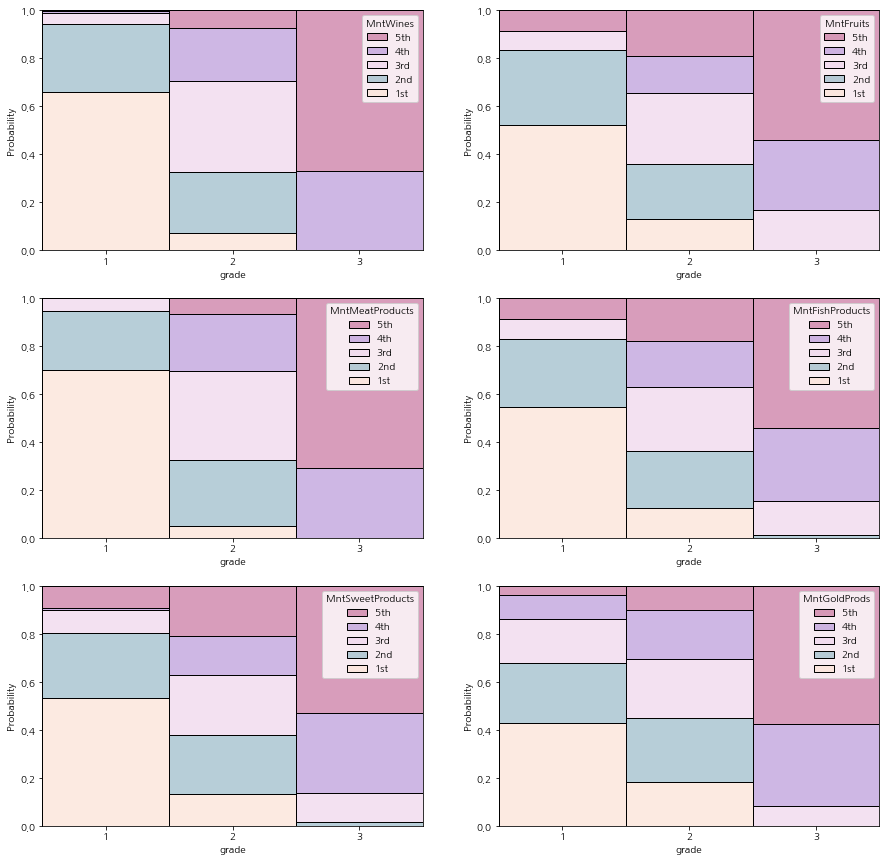

In [ ]:
plt.figure(figsize=(15,15))
for i, col in enumerate(name):
    plt.subplot(3,2,i+1)
    sns.histplot(data = eda_temp, x= 'grade', discrete = True, hue = col, stat='probability', multiple='fill', palette=c3)
    plt.xticks([1,2,3], [1,2,3])
plt.show()

Grade별로 각 제품군마다 소비량의 분포를 categorical data로 나타낸 것으로 
- 기타 제품들에 비해 Wine과 MeatProduct은 grade가 올라갈수록 구매량이 적은 소비자(5th)는 분포하지 않게 됩니다. 
- 동시에 구매량이 많은 소비자(1st)의 비율은 Wine과 MeatProduct에서 더 높아지게 됩니다. 


> 즉, Wine과 MeatProduct이 구매량의 스프레드가 grade별로 두드러지는 제품군이 되어 grade가 낮은 사람을 타겟할 때에 Wine과 MeatProduct의 소비량이 적은 사람을 타겟하는 것이 효율적이라고 생각합니다.

## customer의 특성 (가족관계, 학력 등 - 유리)

### 등급에 따른 가족관계 특성
* Single: single, divorced,widow,absurd,alone,yolo 인 경우
* Together: married,together인 경우

#### Single/Together 분류

In [ ]:
a = eda.Marital_Status
eda['fam'] = a
b = eda.children
eda['offspring'] = b
eda['fam'] = eda['fam'].map({'Divorced':'Single',
                             'Married':'Together',
                             'Widow':'Single',
                             'Absurd':'Single',
                             'Alone':'Single',
                             'YOLO':'Single',
                            'Single':'Single',
                            'Together':'Together'},
                           na_action= "ignore")
eda['offspring'] = eda['offspring'].map({0:0,
                             1:1,
                             2:1,
                             3:1},
                           na_action= "ignore")

In [ ]:
a1 = eda.loc[eda.grade == 1, :]
a2 = eda.loc[eda.grade == 2 ,:]
a3 = eda.loc[eda.grade == 3, :]

In [ ]:
a11 = pd.DataFrame(a1.groupby('fam').ID.count().reset_index(name='ID'))
a22 = pd.DataFrame(a2.groupby('fam').ID.count().reset_index(name='ID'))
a33 = pd.DataFrame(a3.groupby('fam').ID.count().reset_index(name='ID'))

In [ ]:
a11["ratio"] = a11['ID']/a11['ID'].sum(axis=0) *100
a22["ratio"] = a22['ID']/a22['ID'].sum(axis=0) *100
a33["ratio"] = a33['ID']/a33['ID'].sum(axis=0) *100

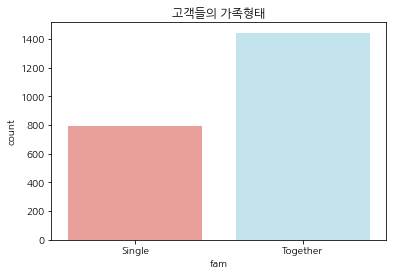

In [ ]:
p = sns.countplot(data = eda,x = 'fam', palette=c1)
p.set_title("고객들의 가족형태")
plt.show()

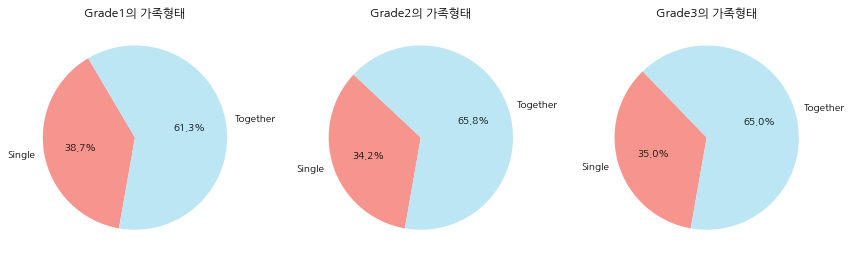

In [ ]:
plt.subplot(1, 3, 1)
plt.pie(a11['ratio'], labels=a11['fam'], autopct='%.1f%%', startangle=260, counterclock=False, colors=c1)
plt.title('Grade1의 가족형태')

plt.subplot(1, 3, 2)
plt.pie(a22['ratio'], labels=a22['fam'], autopct='%.1f%%', startangle=260, counterclock=False, colors=c1)
plt.title('Grade2의 가족형태')

plt.subplot(1, 3, 3)
plt.pie(a33['ratio'], labels=a33['fam'], autopct='%.1f%%', startangle=260, counterclock=False, colors=c1)
plt.title('Grade3의 가족형태')

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
plt.show()

* 등급 무관 항상 Together의 비율이 높다 (등급별 큰 차이 없음)
* Together의 비율이 많은 전체 데이터의 특성이 반영됨
* 따라서 가족관계 비교는 큰 의미 없음

#### 자녀 유무
*자녀 유(1),자녀 무(0)

In [ ]:
c11 = pd.DataFrame(a1.groupby('offspring').ID.count().reset_index(name='ID'))
c22 = pd.DataFrame(a2.groupby('offspring').ID.count().reset_index(name='ID'))
c33 = pd.DataFrame(a3.groupby('offspring').ID.count().reset_index(name='ID'))

In [ ]:
c11["ratio"] = c11['ID']/c11['ID'].sum(axis=0) *100
c22["ratio"] = c22['ID']/c22['ID'].sum(axis=0) *100
c33["ratio"] = c33['ID']/c33['ID'].sum(axis=0) *100

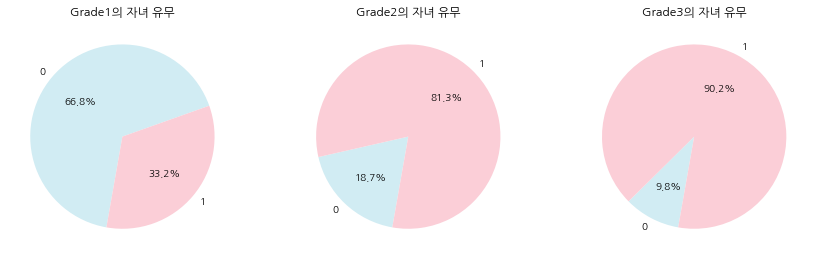

In [ ]:
plt.subplot(1, 3, 1)
plt.pie(c11['ratio'], labels=c11['offspring'], autopct='%.1f%%', startangle=260, counterclock=False, colors=c2)
plt.title('Grade1의 자녀 유무')

plt.subplot(1, 3, 2)
plt.pie(c22['ratio'], labels=c22['offspring'], autopct='%.1f%%', startangle=260, counterclock=False, colors=c2)
plt.title('Grade2의 자녀 유무')

plt.subplot(1, 3, 3)
plt.pie(c33['ratio'], labels=c33['offspring'], autopct='%.1f%%', startangle=260, counterclock=False, colors=c2)
plt.title('Grade3의 자녀 유무')

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

plt.show()

* 1등급에서만 자녀가 없는 고객의 비율이 더 높음 (소비량이 많은 사람들 중 자녀가 없는 사람들이 많음)
* 이유에 대해서 생각해볼때, 교육수준과 가족관계는 등급별 양상이 비슷했으므로 큰 영향을 주지 못했을 가능성이 높음
* 따라서 추가적으로 나이에 대해서 알아보겠음

### 연령분포

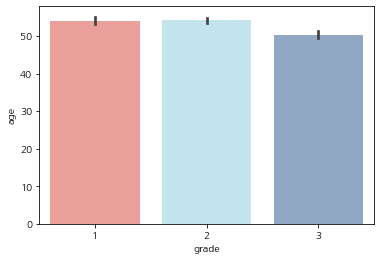

grade
1    54.110714
2    54.165179
3    50.335714
Name: age, dtype: float64
53.19419642857143


In [ ]:
sns.barplot(data=eda, x='grade', y='age',palette=c1)
plt.show()
print(eda.groupby('grade').age.mean())
print(eda.age.mean())

* grade3의 평균 나이가 1, 2에 비해 4살 가량 적음
* 연령대별 구매 방식 차이와 연관지을 수 있을듯

In [ ]:
age_filter = eda[eda['age'] <= 80]
age_filter = age_filter[age_filter['age'] >=10]

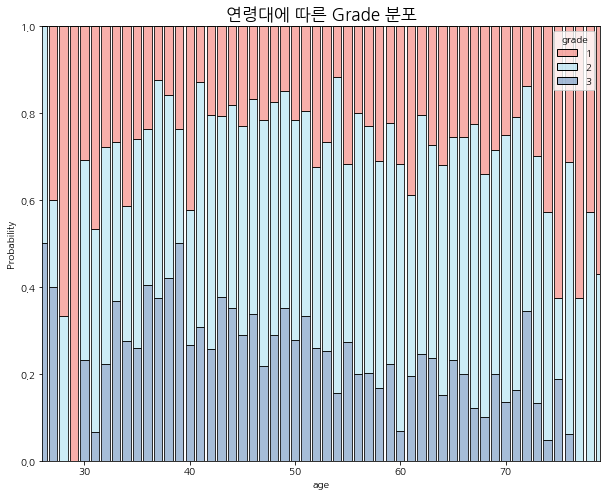

In [ ]:
plt.figure(figsize=(10,8))
plt.rcParams['font.family'] = 'NanumGothic'
sns.histplot(data= age_filter, x='age', hue='grade', multiple= 'fill',discrete=True, stat='probability', shrink=0.8, palette=c1)
plt.title('연령대에 따른 Grade 분포', size=17)
plt.xlim(26,79)
plt.show()

In [ ]:
age = [20,40,60]
q10 = eda[eda['age']<age[0]]
f2 = eda[eda['age']<age[1]]
q2030 = f2[f2['age']>=age[0]]
f3= eda[eda['age']<age[2]]
q4050 = f3[f3['age']>=age[1]]
q60 = eda[eda['age']>=age[2]]

In [ ]:
q10['qage']= 'under 20'
q2030['qage']= '2030'
q4050['qage']= '4050'
q60['qage'] = '60 above'

<ipython-input-36-c29cc8d4f52a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q4050['qage']= '4050'
<ipython-input-36-c29cc8d4f52a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q60['qage'] = '60 above'


In [ ]:
eda1 = pd.concat([q10,q2030,q4050,q60])

In [ ]:
n1 = eda1.loc[eda1.grade == 1, :]
n2 = eda1.loc[eda1.grade == 2 ,:]
n3 = eda1.loc[eda1.grade == 3, :]

In [ ]:
n11 = pd.DataFrame(n1.groupby('qage').ID.count().reset_index(name='ID'))
n22 = pd.DataFrame(n2.groupby('qage').ID.count().reset_index(name='ID'))
n33 = pd.DataFrame(n3.groupby('qage').ID.count().reset_index(name='ID'))

In [ ]:
n11["ratio"] = n11['ID']/n11['ID'].sum(axis=0) *100
n22["ratio"] = n22['ID']/n22['ID'].sum(axis=0) *100
n33["ratio"] = n33['ID']/n33['ID'].sum(axis=0) *100

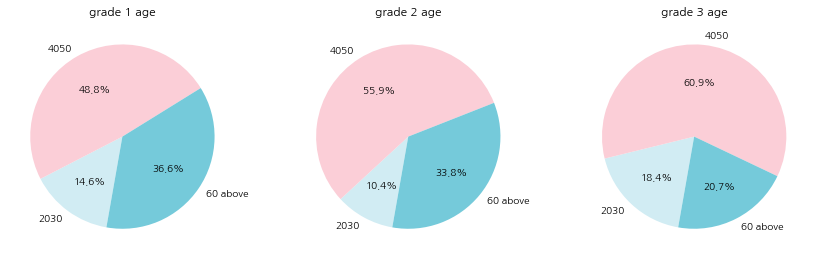

In [ ]:
plt.subplot(1, 3, 1)
plt.pie(n11['ratio'], labels=n11['qage'], autopct='%.1f%%', startangle=260, counterclock=False, colors=c2)
plt.title('grade 1 age')

plt.subplot(1, 3, 2)
plt.pie(n22['ratio'], labels=n22['qage'], autopct='%.1f%%', startangle=260, counterclock=False, colors=c2)
plt.title('grade 2 age')

plt.subplot(1, 3, 3)
plt.pie(n33['ratio'], labels=n33['qage'], autopct='%.1f%%', startangle=260, counterclock=False, colors=c2)
plt.title('grade 3 age')

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

plt.show()

In [ ]:
m11 = pd.DataFrame(q2030.groupby('grade').ID.count().reset_index(name='ID'))
m22 = pd.DataFrame(q4050.groupby('grade').ID.count().reset_index(name='ID'))
m33 = pd.DataFrame(q60.groupby('grade').ID.count().reset_index(name='ID'))

In [ ]:
m11["ratio"] = m11['ID']/m11['ID'].sum(axis=0) *100
m22["ratio"] = m22['ID']/m22['ID'].sum(axis=0) *100
m33["ratio"] = m33['ID']/m33['ID'].sum(axis=0) *100

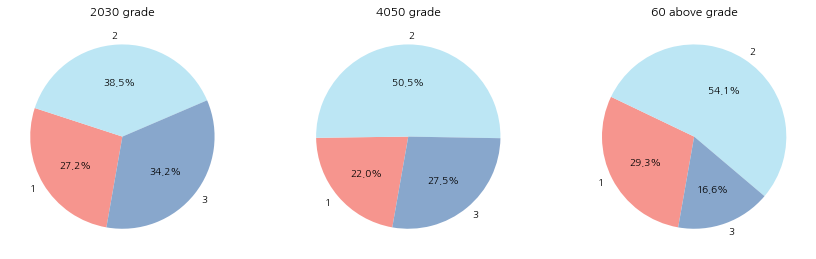

In [ ]:
plt.subplot(1, 3, 1)
plt.pie(m11['ratio'], labels=m11['grade'], autopct='%.1f%%', startangle=260, counterclock=False, colors=c1)
plt.title('2030 grade')

plt.subplot(1, 3, 2)
plt.pie(m22['ratio'], labels=m22['grade'], autopct='%.1f%%', startangle=260, counterclock=False, colors=c1)
plt.title('4050 grade')

plt.subplot(1, 3, 3)
plt.pie(m33['ratio'], labels=m33['grade'], autopct='%.1f%%', startangle=260, counterclock=False, colors=c1)
plt.title('60 above grade')

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

plt.show()

* 1등급의 20대 비율이 적기 때문에 1등급인 고객들에서 자녀가 없는 사람이 많은 이유는 나이가 어린 사람이 많이 포함되어서가 아님
* 따라서 위의 분석 내용을 종합해봤을 때, 자녀가 없는 사람들이 소비량이 많을 가능성이 높음
* 이는 자녀가 없기 때문에 자신만을 위해 소비하는 양을 늘렸다고 해석해볼 수 있음

### Income

#### Grade별 Income

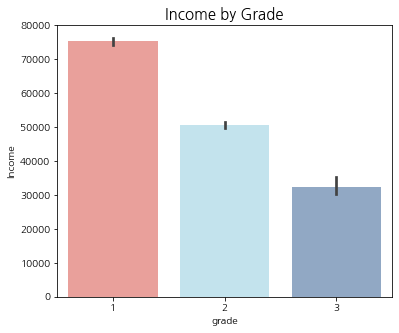

In [ ]:
plt.figure(figsize=(6,5))
sns.barplot(data=eda, x='grade', y='Income',palette=c1).set_title('Income by Grade', size=15 )
plt.show()

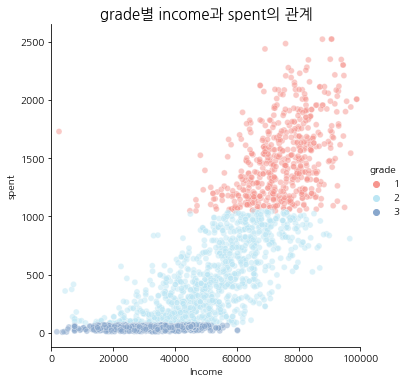

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
sns.relplot(data=eda, x='Income',y='spent', hue='grade', alpha=0.5,palette=c1)
plt.title('grade별 income과 spent의 관계', size=15)
plt.xlim(0,100000)
plt.show()

<Figure size 1080x648 with 0 Axes>

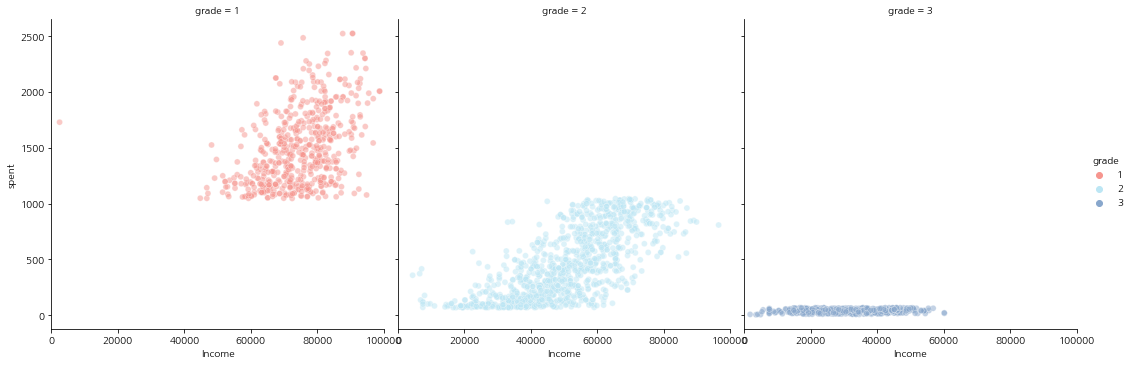

In [ ]:
plt.figure(figsize=(15,9))
sns.relplot(data=eda, x='Income',y='spent', hue='grade', alpha=0.5, col='grade', palette=c1)
plt.xlim(0,100000)
plt.show()

* 먼저 높은 등급의 고객일수록 수입이 많은 경향을 알 수 있으며, 1등급 고객들은 spent가 많다.
* 따라서 income이 높은 고객이 spent 또한 높은 경향성을 보이는 것을 알 수 있다.
* 많이 버는 사람이 많이 산다는 사실을 유추할 수 있다.
* 많이 사는 고객들은 어떤 매체를 이용하여 주로 구매하는지 4에서 알아보기

#### 학력수준별 Income

In [ ]:
ce1 = ['#fce767','#ec5f88','#4eb8c5','#add288']

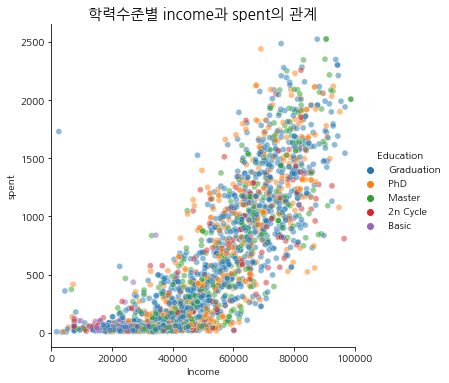

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
sns.relplot(data= eda, x='Income',y='spent',hue = 'Education', alpha=0.5)
plt.title('학력수준별 income과 spent의 관계', size=15)
plt.xlim(0,100000)
plt.show()

In [ ]:
plt.figure(figsize=(15,9))
sns.relplot(data=eda, x='Income',y='spent', hue='edu', alpha=0.5, col='edu', palette=ce1)
plt.xlim(0,100000)
plt.show()

* income과 소비량 간의 양의 상관관계 (높은 income인 사람이 소비가 많은 경향이 있음)
* 저학력 Basic은 다른 학력에 비해 확연히 income이 적은 쪽에 분포되어 있다. 이에 따라 소비량도 적다.
> 따라서 2,3등급 중 고학력(Basic X)이면서 자녀가 없는 고객이 등급이 상승할 가능성이 높음

### Grade별 학력 수준

In [ ]:
a = eda.Education
eda['edu'] = a

In [ ]:
eda['edu'] = eda['edu'].map({'2n Cycle':'Master',
                             'Master':'Master',
                            'Graduation':'Graduation',
                            'Basic':'Basic',
                            'PhD':'PhD'
                            },
                           na_action= "ignore")

In [ ]:
m1 = eda.loc[eda.grade == 1, :]
m2 = eda.loc[eda.grade == 2 ,:]
m3 = eda.loc[eda.grade == 3, :]

#### Grade를 기준으로 한 학력수준

In [ ]:
ce = ['#cb7da4','#be9fdb','#efd7ed','#9fbecb']

In [ ]:
m11 = pd.DataFrame(m1.groupby('edu').ID.count().reset_index(name='ID'))
m22 = pd.DataFrame(m2.groupby('edu').ID.count().reset_index(name='ID'))
m33 = pd.DataFrame(m3.groupby('edu').ID.count().reset_index(name='ID'))
m11["ratio"] = m11['ID']/m11['ID'].sum(axis=0) *100
m22["ratio"] = m22['ID']/m22['ID'].sum(axis=0) *100
m33["ratio"] = m33['ID']/m33['ID'].sum(axis=0) *100

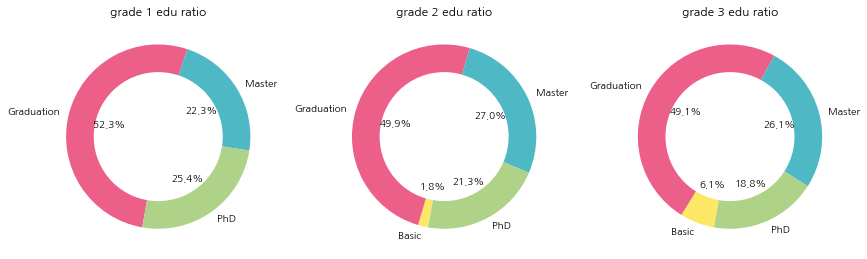

In [ ]:
plt.subplot(1, 3, 1)
plt.pie(m11['ratio'], labels=m11['edu'], autopct='%.1f%%', startangle=260, counterclock=False, colors=['#ec5f88','#4eb8c5','#add288'],
       pctdistance=0.55)
plt.title('grade 1 edu ratio')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.subplot(1, 3, 2)
plt.pie(m22['ratio'], labels=m22['edu'], autopct='%.1f%%', startangle=260, counterclock=False, colors=ce1,pctdistance=0.55)
plt.title('grade 2 edu ratio')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.subplot(1, 3, 3)
plt.pie(m33['ratio'], labels=m33['edu'], autopct='%.1f%%', startangle=260, counterclock=False, colors=ce1,pctdistance=0.55)
plt.title('grade 3 edu ratio')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
plt.show()

* 일반적으로 graduation-석박사-Basic 순으로 비율이 크다 => 고객 전반적으로 학력수준이 높은 편
* 1등급에서 Basic 학력을 가진 사람 없음
* 등급이 높아질수록 저학력자 비율이 늘어나는 경향성

#### 제품군별 소비량을 기준으로 한 학력수준

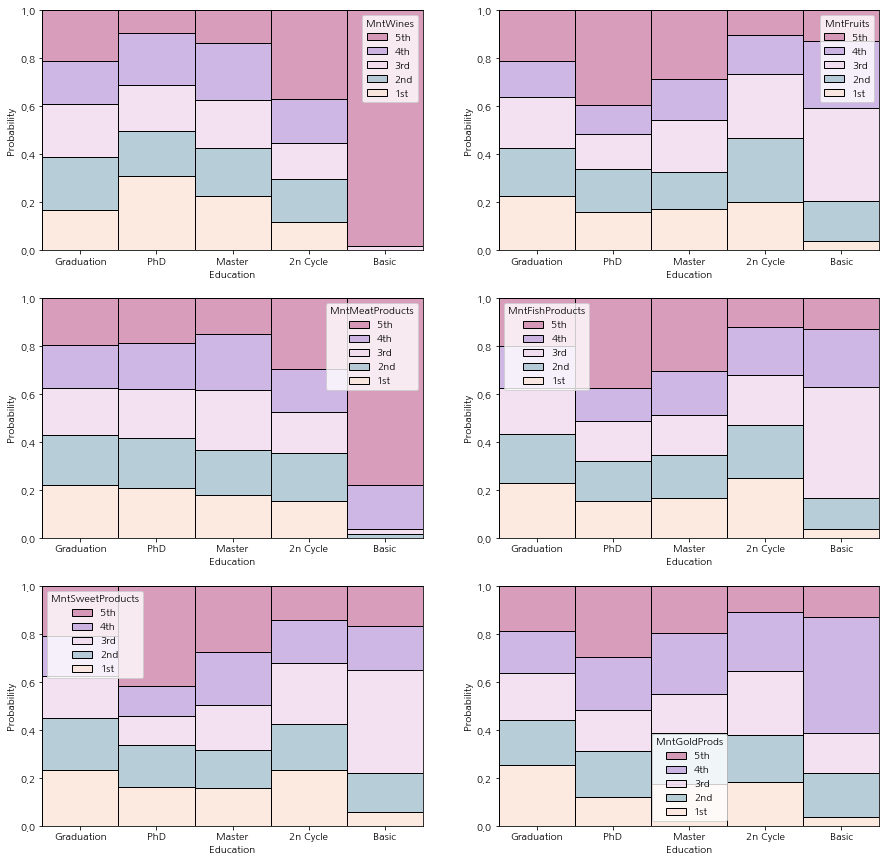

In [ ]:
plt.figure(figsize=(15,15))
for i, col in enumerate(name):
    plt.subplot(3,2,i+1)
    sns.histplot(data = eda_temp, x= 'Education', discrete = True, hue = col, stat='probability', multiple='fill', palette=c3)
plt.show()

### Complain 경향

In [ ]:
eda.groupby('grade').size()

grade
1     560
2    1120
3     560
dtype: int64

In [ ]:
eda.groupby('grade').Complain.sum()

grade
1     2
2    10
3     9
Name: Complain, dtype: int64

In [ ]:
ratio_complain = eda.groupby('grade').Complain.sum()/eda.groupby('grade').size()

In [ ]:
ratio_complain

grade
1    0.003571
2    0.008929
3    0.016071
dtype: float64

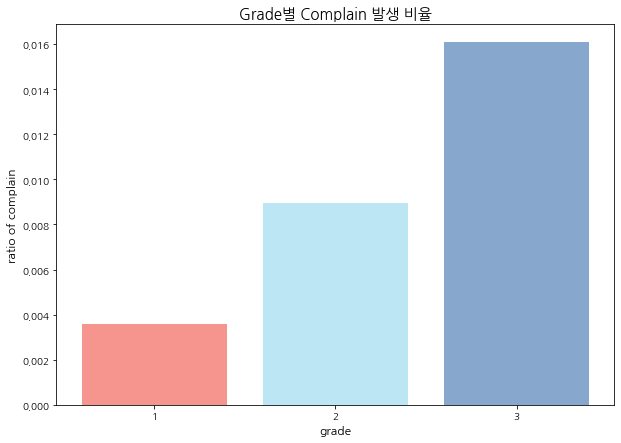

In [ ]:
plt.figure(figsize=(10,7))
plt.rcParams['font.family'] = 'NanumGothic'
plt.bar(x=[1,2,3], height=ratio_complain, color=c1)
plt.xlabel('grade', size=12)
plt.ylabel('ratio of complain', size=12)
plt.title('Grade별 Complain 발생 비율', size=15)
plt.xticks([1,2,3])
plt.show()

* complain은 매우 조금 발생하였으나 총 22번 가운데 9번이 grade3에서 발생하였다.
* 적게 구매한 사람이 complain도 많이 제기한 것이므로 할인행사를 통해 기업에 대한 호감도를 사면 좋을듯

## customer의 구매 경로 (서현, 용호)

### 각 등급들의 구매 경로 비율
(각 구매 방식 별 횟수/전체 구매 횟수) 비율을 통해 구매 양상이 어떻게 되는지 확인!

#### 등급별 비율

In [ ]:
eda2 = eda[["grade","Income", "Education", "Marital_Status", "children",'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5','Response']]

In [ ]:
eda2["TotalPurchase"] = eda["NumStorePurchases"] +  eda["NumWebPurchases"] + eda["NumDealsPurchases"] + eda["NumCatalogPurchases"]

<ipython-input-63-b1ac04bf8469>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda2["TotalPurchase"] = eda["NumStorePurchases"] +  eda["NumWebPurchases"] + eda["NumDealsPurchases"] + eda["NumCatalogPurchases"]


In [ ]:
eda2["TotalPurchase"] = eda["NumStorePurchases"] +  eda["NumWebPurchases"] + eda["NumDealsPurchases"] + eda["NumCatalogPurchases"]
eda2["DealsPurchases"] = eda2["NumDealsPurchases"]/eda2["TotalPurchase"]
eda2["CatalogPurchases"] = eda2["NumCatalogPurchases"]/eda2["TotalPurchase"]
eda2["StorePurchases"] = eda2["NumStorePurchases"]/eda2["TotalPurchase"]
eda2["WebPurchases"] = eda2["NumWebPurchases"]/eda2["TotalPurchase"]

<ipython-input-64-4ab6cbbaaaa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda2["TotalPurchase"] = eda["NumStorePurchases"] +  eda["NumWebPurchases"] + eda["NumDealsPurchases"] + eda["NumCatalogPurchases"]
<ipython-input-64-4ab6cbbaaaa5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda2["DealsPurchases"] = eda2["NumDealsPurchases"]/eda2["TotalPurchase"]
<ipython-input-64-4ab6cbbaaaa5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [ ]:
eda2 = eda2.fillna(0)

In [ ]:
eda_g_p = eda2.groupby("grade").mean().reset_index()

<ipython-input-67-abaf3e1aa867>:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='#999999',axis='y')
<ipython-input-67-abaf3e1aa867>:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='#999999',axis='y')
<ipython-input-67-abaf3e1aa867>:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='#999999',axis='y')
<ipython-input-67-abaf3e1aa867>:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='#99

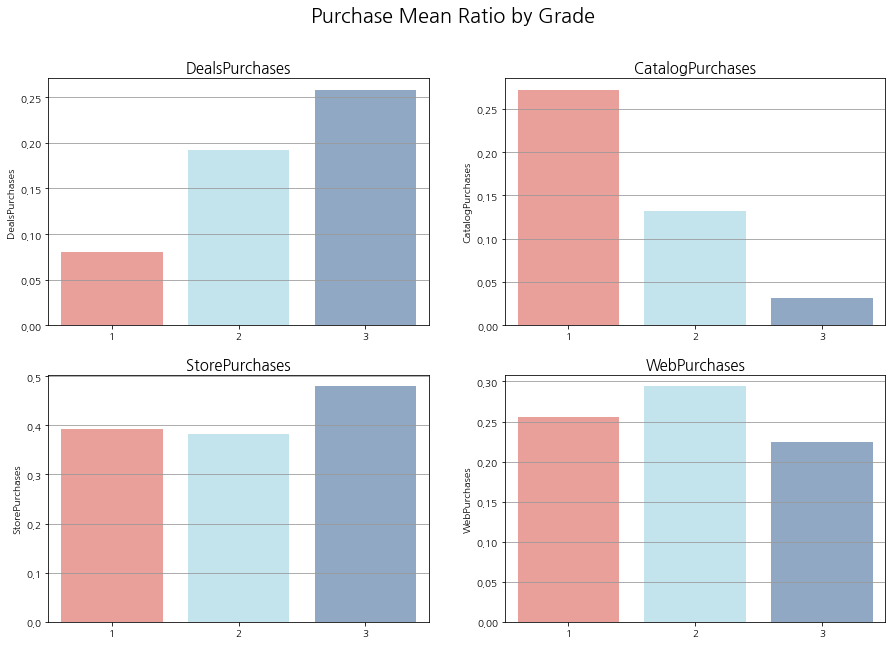

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))
colors = ['r','b']
name = ["DealsPurchases", "CatalogPurchases", "StorePurchases", "WebPurchases"]
c = ["DealsPurchases", "CatalogPurchases", "StorePurchases", "WebPurchases"]

for i,ax in enumerate(axes.reshape(-1)): 
 
    sns.barplot(ax=ax, data=eda_g_p, x='grade', y=c[i], palette=c1).set(xlabel='')
    ax.set_facecolor('white')
    ax.grid(b=True, color='#999999',axis='y')
    ax.set_title(name[i], loc='center',size = 15)


fig.suptitle('Purchase Mean Ratio by Grade', size = 20)
plt.show()

<결론>
- 할인: 낮은 그룹일수록 할인을 통해 구매하는 비율이 큼. -> 할인 적극 사용
- 카탈로그: 높은 그룹일수록 카탈로그 많이 사용. -> 카탈로그가 적게 제공된 것은 아닐까? 카탈로그 제공 늘리기
  - 원인은 income과 관련 : 그룹이 낮을수록 income이 낮음 & income이 낮을수록 할인을 통한 구매율 많고, 카탈로그를 통한 구매율 적음 (근거: 아래 두 산점도 그래프 + 그룹과 income 관계 그래프)
    - income이 낮을수록 카탈로그의 필요성 적음. 
    - ▶ 낮은 income의 사람들에게도 카탈로그 정기적으로(혹은 무료로) 배포하자! 

- ▶ 2그룹 -> 1그룹 : 카탈로그 경험 늘리기!
- ▶ 3그룹 -> 2그룹 : store->web 경험 늘리기! (2그룹에 비해 web 구매율이 적고 store 구매율이 큼)
    - 그럼 web 방문 수는 어떻게 될까...? (->세번째 그래프)

#### Income과 구매경로간의 상관관계

In [ ]:
eda2[eda2.Income==eda2.Income.max()]

,grade,Income,Education,Marital_Status,children,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,...,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,TotalPurchase,DealsPurchases,CatalogPurchases,StorePurchases,WebPurchases
2233,3,666666.0,Graduation,Together,1,4,3,1,3,6,...,0,0,0,0,0,11,0.363636,0.090909,0.272727,0.272727


In [ ]:
eda2 = eda2.drop(2233)      #outlier 제거

C:\Users\kjm\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self.fig.tight_layout(*args, **kwargs)
C:\Users\kjm\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


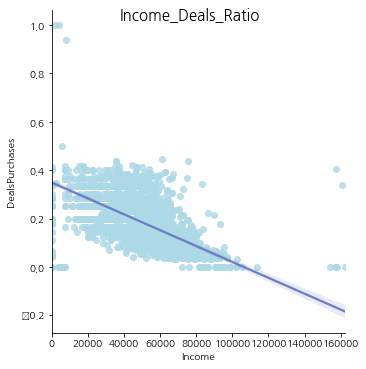

[[ 1.         -0.65145819]
 [-0.65145819  1.        ]]


In [ ]:
sns.lmplot(x='Income',y='DealsPurchases',data=eda2, scatter_kws={"color":"lightblue"},
          line_kws={"color":"#6A7FC4"})
plt.suptitle('Income_Deals_Ratio', size = 15)
plt.show()
print(np.corrcoef(eda2['Income'],eda2['DealsPurchases']))

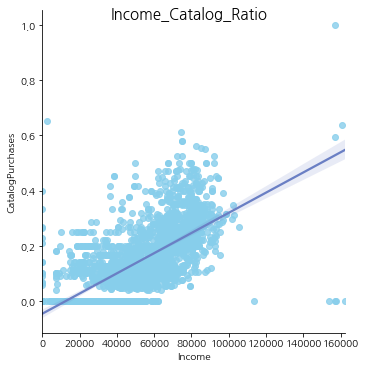

[[1.         0.63428444]
 [0.63428444 1.        ]]


In [ ]:
sns.lmplot(x='Income',y='CatalogPurchases',data=eda2, scatter_kws={"color":"skyblue"},
          line_kws={"color":"#6A7FC4"})
plt.suptitle('Income_Catalog_Ratio', size = 15)
plt.show()
print(np.corrcoef(eda2['Income'],eda2['CatalogPurchases']))

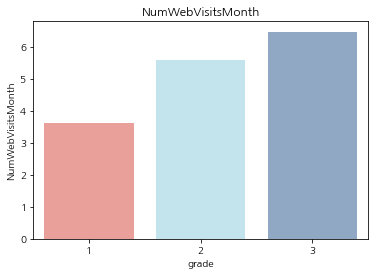

In [ ]:
sns.barplot(data=eda_g_p,
           x = 'grade',
           y = 'NumWebVisitsMonth', palette=c1)
plt.title("NumWebVisitsMonth")
plt.show()

- 3그룹이 웹사이트 방문수가 제일 많음!! but 웹사이트를 통한 구매 비율은 가장 적었음 => 웹사이트 구매에 어려움/서비스에 불만족 
    - ▶ 3그룹을 2그룹으로 만들기 위해서는 3그룹을 위한 웹사이트 서비스 개선!

#### Web, Store 방문횟수와 Grade간의 관계

In [ ]:
eda1 = pd.read_csv('eda.csv')

In [ ]:
eda1

,Unnamed: 0,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Year_Old,Year_Customer,Response,campaign,spent,grade
0,0,5524,Graduation,Single,58138.0,0,0,58,635,88,...,0,0,3,11,57,2,1,0,1617,1
1,11,2125,Graduation,Divorced,63033.0,0,0,82,194,61,...,0,0,3,11,55,1,0,0,1102,1
2,14,2114,PhD,Single,82800.0,0,0,23,1006,22,...,0,0,3,11,68,2,1,2,1315,1
3,17,6565,Master,Married,76995.0,0,1,91,1012,80,...,0,0,3,11,65,1,0,1,1782,1
4,20,5376,Graduation,Married,2447.0,1,0,42,1,1,...,0,0,3,11,35,1,0,0,1730,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,2200,1448,Master,Married,33562.0,1,2,33,21,12,...,0,0,3,11,51,0,0,0,51,3
2212,2205,10084,Graduation,Married,24434.0,2,0,9,3,2,...,0,0,3,11,42,0,0,0,50,3
2213,2208,8080,Graduation,Single,26816.0,0,0,50,5,1,...,0,0,3,11,28,2,0,0,22,3
2214,2209,9432,Graduation,Together,666666.0,1,0,23,9,14,...,0,0,3,11,37,1,0,0,62,3


In [ ]:
def response_rate(x) : #Response rate 표현
    return round(x.mean()*100, 4)

In [ ]:
# WEB, STORE 방문 수 3등분하는 함수
def bins_q(fea) : 
    q0 = np.quantile(eda1[fea], 0)
    q1 = np.quantile(eda1[fea], 0.33)
    q2 = np.quantile(eda1[fea], 0.66)
    q3 = np.quantile(eda1[fea], 1)
    return [q0, q1, q2, q3]
label = ['LF', 'MF', 'HF']

s1 = pd.cut(eda1.NumWebPurchases, bins = bins_q('NumWebPurchases'), labels = label)
s2 = pd.cut(eda1.NumStorePurchases, bins = bins_q('NumStorePurchases'), labels = label)

Web_Store = pd.concat([s1, s2, eda1.Response,eda1.grade], axis = 1)
Web_Store.fillna(value='LF',inplace=True)
Web_Store

,NumWebPurchases,NumStorePurchases,Response,grade
0,HF,LF,1,1
1,MF,HF,0,1
2,HF,HF,1,1
3,HF,HF,0,1
4,LF,LF,0,1
...,...,...,...,...
2211,LF,LF,0,3
2212,LF,LF,0,3
2213,LF,LF,0,3
2214,MF,LF,0,3


In [ ]:
eda_web = Web_Store.groupby(['grade','NumWebPurchases', 'NumStorePurchases'])['Response'].agg(response_rate).unstack()
eda_web.fillna(value=0,inplace=True)
eda_web1 = eda_web.loc[1]
eda_web2 = eda_web.loc[2]
eda_web3 = eda_web.loc[3]

eda_web

NumStorePurchases           LF       MF       HF
grade NumWebPurchases                           
1     LF                0.0000  18.1818  18.1818
      MF               50.0000  44.0860  20.6452
      HF               57.1429  40.2597  24.8408
2     LF                9.1429   3.7037   6.2500
      MF               18.9189   7.2289  10.1562
      HF               22.6415  16.1290   7.8313
3     LF                5.5227   0.0000   0.0000
      MF                6.5217   0.0000   0.0000
      HF                0.0000   0.0000   0.0000

In [ ]:
eda_web1L = eda_web1.loc['LF']
eda_web1M = eda_web1.loc['MF']
eda_web1H = eda_web1.loc['HF']

eda_web2L = eda_web2.loc['LF']
eda_web2M = eda_web2.loc['MF']
eda_web2H = eda_web2.loc['HF']

eda_web3L = eda_web3.loc['LF']
eda_web3M = eda_web3.loc['MF']
eda_web3H = eda_web3.loc['HF']

In [ ]:
c1 = ['#f6958e','#bce6f4','#88a7cc']

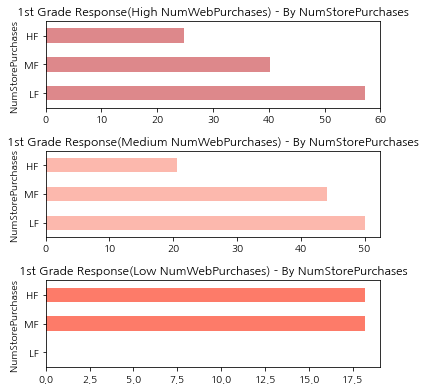

In [ ]:
# 이 그래프가 무엇을 의미하는것인가?
plt.subplot(3, 1, 1) 
eda_web1H.plot(kind = "barh",title='1st Grade Response(High NumWebPurchases) - By NumStorePurchases',stacked=True,xlabel='NumStorePurchases	',ylabel='Response', 
               color='#dd888b')
plt.subplot(3, 1, 2) 
eda_web1M.plot(kind = "barh",title='1st Grade Response(Medium NumWebPurchases) - By NumStorePurchases',stacked=True,xlabel='NumStorePurchases	',ylabel='Response', 
               color='#fcb8ad')
plt.subplot(3, 1, 3) 
eda_web1L.plot(kind = "barh",title='1st Grade Response(Low NumWebPurchases) - By NumStorePurchases',stacked=True,xlabel='NumStorePurchases	',ylabel='Response', color='#fd7b69')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=1.3, wspace=0.5, hspace=0.5) 
plt.show()

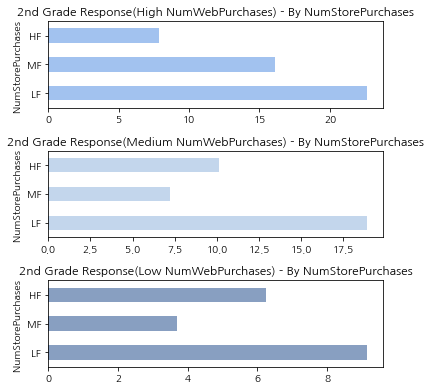

In [ ]:
# 2등급 고객 중 Web 이용 빈도수에 따른 Store 구매 빈도 (Web과 Store 구매간의 관계)
plt.subplot(3, 1, 1) 
eda_web2H.plot(kind = "barh",title='2nd Grade Response(High NumWebPurchases) - By NumStorePurchases',stacked=True,
               xlabel='NumStorePurchases	',ylabel='Response', color='#a2c2ef')
plt.subplot(3, 1, 2) 
eda_web2M.plot(kind = "barh",title='2nd Grade Response(Medium NumWebPurchases) - By NumStorePurchases',stacked=True,
               xlabel='NumStorePurchases	',ylabel='Response',color='#c3d6ec')
plt.subplot(3, 1, 3) 
eda_web2L.plot(kind = "barh",title='2nd Grade Response(Low NumWebPurchases) - By NumStorePurchases',stacked=True,
               xlabel='NumStorePurchases	',ylabel='Response',color='#889fc1')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=1.3, wspace=0.5, hspace=0.5) 
plt.show()

C:\Users\kjm\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


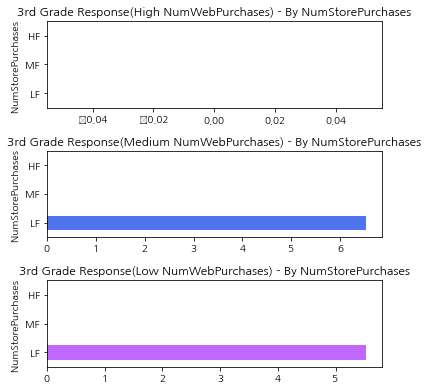

In [ ]:
# 3등급 고객 중 Web 이용 빈도수에 따른 Store 구매 빈도 (Web과 Store 구매간의 관계)
plt.rcParams['font.family'] = 'NanumGothic'
plt.subplot(3, 1, 1) 
eda_web3H.plot(kind = "barh",title='3rd Grade Response(High NumWebPurchases) - By NumStorePurchases',stacked=True,
               xlabel='NumStorePurchases	',ylabel='Response', color='#4e74ee')
plt.subplot(3, 1, 2) 
eda_web3M.plot(kind = "barh",title='3rd Grade Response(Medium NumWebPurchases) - By NumStorePurchases',stacked=True,
               xlabel='NumStorePurchases	',ylabel='Response', color='#4e74ee')
plt.subplot(3, 1, 3) 
eda_web3L.plot(kind = "barh",title='3rd Grade Response(Low NumWebPurchases) - By NumStorePurchases',stacked=True,
               xlabel='NumStorePurchases	',ylabel='Response', color='#bf67ff')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=1.3, wspace=0.5, hspace=0.5) 
plt.show()

#### 나이별 구매경로

In [ ]:
bins = [0, 20, 40, 60, 121]
labels = ['Young', 'Middle-L', 'Middle-H', 'Old']

s1 = pd.cut(eda1.Year_Old, bins = bins, labels = labels)

Year_cat = pd.concat([eda1.grade, s1, eda1.Response], axis = 1)
Year_cat

,grade,Year_Old,Response
0,1,Middle-H,1
1,1,Middle-H,0
2,1,Old,1
3,1,Old,0
4,1,Middle-L,0
...,...,...,...
2211,3,Middle-H,0
2212,3,Middle-H,0
2213,3,Middle-L,0
2214,3,Middle-L,0


In [ ]:
eda_year = Year_cat.groupby(['grade','Year_Old'])['Response'].agg(response_rate).unstack()
eda_year

Year_Old,Young,Middle-L,Middle-H,Old
grade,,,,
1,50.0000,32.1053,29.0323,28.0488
2,33.3333,12.3684,11.8557,12.5874
3,0.0000,7.6628,4.0486,2.3810


In [ ]:
eda_year1 = eda_year.loc[1]
eda_year2 = eda_year.loc[2]
eda_year3 = eda_year.loc[3]

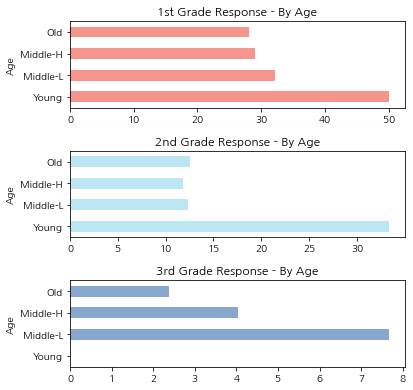

In [ ]:
plt.subplot(3, 1, 1) 
eda_year1.plot(kind = "barh",title='1st Grade Response - By Age',stacked=True,xlabel='Age',ylabel='Response', color=c1[0])
plt.subplot(3, 1, 2) 
eda_year2.plot(kind = "barh",title='2nd Grade Response - By Age',stacked=True,xlabel='Age',ylabel='Response', color=c1[1])
plt.subplot(3, 1, 3) 
eda_year3.plot(kind = "barh",title='3rd Grade Response - By Age',stacked=True,xlabel='Age',ylabel='Response', color=c1[2])
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=1.3, wspace=0.5, hspace=0.5) 
plt.show()

In [ ]:
s3 = pd.cut(eda1.Year_Old, bins = bins, labels = labels)
s4 = pd.cut(eda1.NumWebPurchases, bins = bins_q('NumWebPurchases'), labels = label)

Web_Year = pd.concat([eda1.grade,s3, s4, eda1.Response], axis = 1)
Web_Year.NumWebPurchases.fillna(value='LF',inplace=True)
Web_Year

,grade,Year_Old,NumWebPurchases,Response
0,1,Middle-H,HF,1
1,1,Middle-H,MF,0
2,1,Old,HF,1
3,1,Old,HF,0
4,1,Middle-L,LF,0
...,...,...,...,...
2211,3,Middle-H,LF,0
2212,3,Middle-H,LF,0
2213,3,Middle-L,LF,0
2214,3,Middle-L,MF,0


In [ ]:
eda_web_old = Web_Year.groupby(['grade','NumWebPurchases', 'Year_Old'])['Response'].agg(response_rate).unstack()
eda_web_old.fillna(value=0,inplace=True)
eda_web_old

Year_Old               Young  Middle-L  Middle-H      Old
grade NumWebPurchases                                    
1     LF                 0.0    0.0000   31.5789   0.0000
      MF                50.0   38.4615   24.8175  34.2105
      HF               100.0   30.5882   33.3333  25.6410
2     LF                 0.0    8.6022    8.1633   7.4074
      MF                50.0   12.2995   12.9151  14.2857
      HF                 0.0   16.0000   12.2066  13.3333
3     LF                 0.0    7.3276    4.3290   2.4390
      MF                 0.0   10.3448    0.0000   0.0000
      HF                 0.0    0.0000    0.0000   0.0000

In [ ]:
eda_web_old1 = eda_web_old.loc[1]
eda_web_old2 = eda_web_old.loc[2]
eda_web_old3 = eda_web_old.loc[3]
eda_web_old1

Year_Old,Young,Middle-L,Middle-H,Old
NumWebPurchases,,,,
LF,0.0,0.0000,31.5789,0.0000
MF,50.0,38.4615,24.8175,34.2105
HF,100.0,30.5882,33.3333,25.6410


In [ ]:
eda_web_old1L = eda_web_old1.loc['LF']
eda_web_old1M = eda_web_old1.loc['MF']
eda_web_old1H = eda_web_old1.loc['HF']

eda_web_old2L = eda_web_old2.loc['LF']
eda_web_old2M = eda_web_old2.loc['MF']
eda_web_old2H = eda_web_old2.loc['HF']

eda_web_old3L = eda_web_old3.loc['LF']
eda_web_old3M = eda_web_old3.loc['MF']
eda_web_old3H = eda_web_old3.loc['HF']

In [ ]:
eda_web_old1L

Year_Old
Young        0.0000
Middle-L     0.0000
Middle-H    31.5789
Old          0.0000
Name: LF, dtype: float64

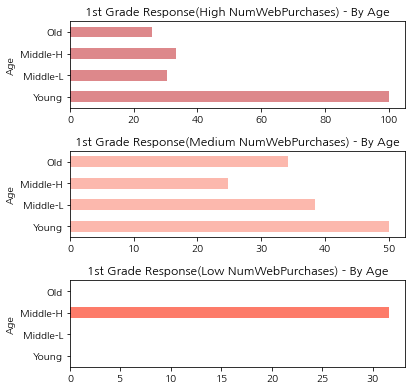

In [ ]:
plt.subplot(3, 1, 1) 
eda_web_old1H.plot(kind = "barh",title='1st Grade Response(High NumWebPurchases) - By Age',stacked=True,
                   xlabel='Age',ylabel='Response', color='#dd888b')
plt.subplot(3, 1, 2) 
eda_web_old1M.plot(kind = "barh",title='1st Grade Response(Medium NumWebPurchases) - By Age',stacked=True,
                   xlabel='Age',ylabel='Response',color='#fcb8ad')
plt.subplot(3, 1, 3) 
eda_web_old1L.plot(kind = "barh",title='1st Grade Response(Low NumWebPurchases) - By Age',stacked=True,
                   xlabel='Age',ylabel='Response',color='#fd7b69')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=1.3, wspace=0.5, hspace=0.5) 
plt.show()

* 1등급 고객들 같은 경우 Web 이용 빈도수가 HF,MF인 고객들의 반응이 압도적으로 높았다. 특히 Young age같은 경우 Web 이용 빈도수가 특히나 높았다.

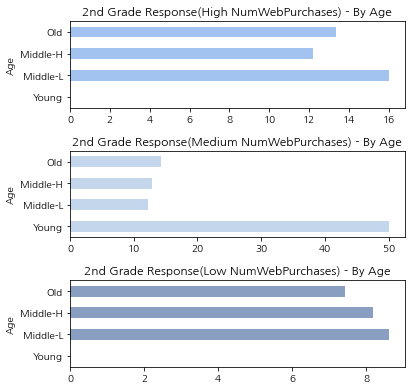

In [ ]:
plt.subplot(3, 1, 1) 
eda_web_old2H.plot(kind = "barh",title='2nd Grade Response(High NumWebPurchases) - By Age',stacked=True,
                   xlabel='Age',ylabel='Response', color='#a2c2ef')
plt.subplot(3, 1, 2) 
eda_web_old2M.plot(kind = "barh",title='2nd Grade Response(Medium NumWebPurchases) - By Age',stacked=True,
                   xlabel='Age',ylabel='Response',color='#c3d6ec')
plt.subplot(3, 1, 3) 
eda_web_old2L.plot(kind = "barh",title='2nd Grade Response(Low NumWebPurchases) - By Age',stacked=True,
                   xlabel='Age',ylabel='Response',color='#889fc1')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=1.3, wspace=0.5, hspace=0.5) 
plt.show()

* 1등급에 비해서 2등급 고객들은 Web 구매 경험이 보다 적은 고객들의 비중이 더 높다는 것이 특징이다. 2등급 고객들을 1등급 고객으로 높이기 위해서는 Web을 통해서 구매를 유도하는 것도 방법이라고 생각한다. 스토어에 웹으로 구매시 얼마 할인과 같은 이벤트를 진행해도 좋을 것 같다.

C:\Users\kjm\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


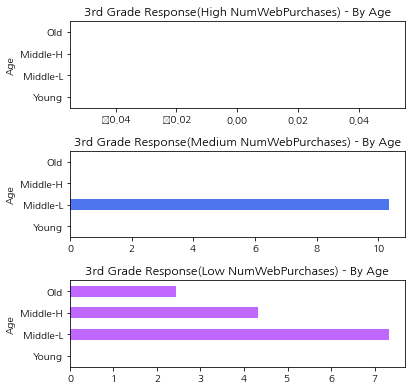

In [ ]:
plt.subplot(3, 1, 1) 
eda_web_old3H.plot(kind = "barh",title='3rd Grade Response(High NumWebPurchases) - By Age',stacked=True,
                   xlabel='Age',ylabel='Response', color='#7c84bc')
plt.subplot(3, 1, 2) 
eda_web_old3M.plot(kind = "barh",title='3rd Grade Response(Medium NumWebPurchases) - By Age',stacked=True,
                   xlabel='Age',ylabel='Response',color='#4e74ee')
plt.subplot(3, 1, 3) 
eda_web_old3L.plot(kind = "barh",title='3rd Grade Response(Low NumWebPurchases) - By Age',stacked=True,
                   xlabel='Age',ylabel='Response',color='#bf67ff')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=1.3, wspace=0.5, hspace=0.5) 
plt.show()

* 3등급 고객들 같은 경우 모든 고객들이 Web을 통한 구매 경험이 적다는 것이 특징이다. 3등급 고객들의 Response를 올리기 위해서는 Web으로의 유입을 위한 이벤트가 있으면 좋을 것 같다.

In [ ]:
bins = bins_q('Recency')
labels = ['LF', 'MF', 'HF']

s6 = pd.cut(eda1.Recency, bins = bins, labels = labels)
Rec = pd.concat([eda1.grade, s6, eda1.Response], axis = 1)
eda_rec = Rec.groupby(['grade','Recency'])['Response'].agg(response_rate).unstack()
eda_rec

Recency,LF,MF,HF
grade,,,
1,41.9540,29.0323,18.9474
2,21.8232,8.8154,5.7851
3,10.4651,5.5838,1.1050


In [ ]:
eda_rec1 = eda_rec.loc[1]
eda_rec2 = eda_rec.loc[2]
eda_rec3 = eda_rec.loc[3]

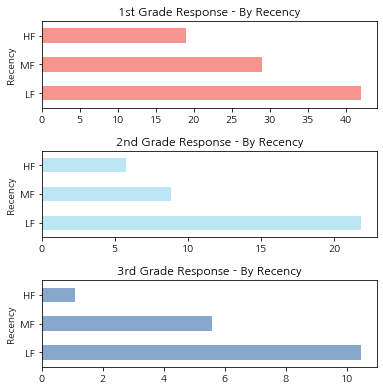

In [ ]:
# Recency에 따른 등급별 반응
plt.subplot(3, 1, 1) 
eda_rec1.plot(kind = "barh",title='1st Grade Response - By Recency',stacked=True,
              xlabel='Recency',ylabel='Response', color=c1[0])
plt.subplot(3, 1, 2) 
eda_rec2.plot(kind = "barh",title='2nd Grade Response - By Recency',stacked=True,
              xlabel='Recency',ylabel='Response', color=c1[1])
plt.subplot(3, 1, 3) 
eda_rec3.plot(kind = "barh",title='3rd Grade Response - By Recency',stacked=True,
              xlabel='Recency',ylabel='Response', color=c1[2])
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=1.3, wspace=0.5, hspace=0.5) 
plt.show()

> 1등급,2등급,3등급 모두 Recency가 LF일수록(최근에 구매했을수록) 응답률이 높음을 확인할 수 있다.

### 각 등급들의 품목별 구매경로

In [ ]:
grade_wine = pd.pivot_table(eda_temp, index='grade', columns='MntWines', 
               values=eda.columns[15:19], aggfunc='median', fill_value=0)
grade_wine

NumCatalogPurchases                  NumDealsPurchases              \
MntWines                 5th 4th  3rd 2nd 1st               5th 4th 3rd 2nd   
grade                                                                         
1                         28  22  4.5   6   6               7.5  15   1   1   
2                          1   1  2.0   3   3               2.0   2   2   3   
3                          0   0  0.0   0   0               1.0   2   0   0   

             NumStorePurchases                   NumWebPurchases              \
MntWines 1st               5th 4th  3rd  2nd 1st             5th 4th 3rd 2nd   
grade                                                                          
1          1                 0   1  7.5  8.5   9               0   0   4   5   
2          2                 3   4  5.0  8.0   9               2   2   4   6   
3          0                 3   3  0.0  0.0   0               1   1   0   0   

              
MntWines 1st  
grade         
1          5  
2          7  
3          0

C:\Users\kjm\anaconda3\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


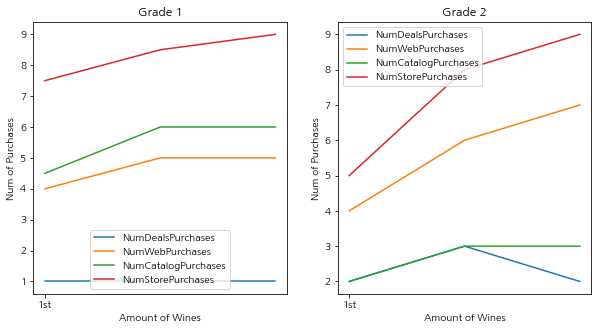

In [ ]:
name = eda.columns[15:19]

plt.figure(figsize=(10,5))
plt.rcParams['font.family'] = 'NanumGothic'
for i in range(2):
    plt.subplot(1,2,i+1)
    for col in name:
        plt.plot(grade_wine.loc[i+1, col][2:], label=str(col))
    plt.legend()
    plt.title(f'Grade {i+1}')
    plt.ylabel('Num of Purchases')
    plt.xlabel('Amount of Wines')
plt.show()

> Grade 3는 데이터가 없어서 그리지 못했고, Wine에 대한 것이긴 하지만 Wine 소비량이 늘수록 대게 구매 횟수가 증가하지만 할인해서 사는 경우는 증가하는 것이 확인되지 않아 Wine의 판매량을 높여 grade를 높인다고 할 때엔 할인책은 지양해야한다고 생각합니다.

## customer의 캠페인 반응 경향 (종민, 서현, 용호)

### campaign 참여 횟수

In [ ]:
p1 = pd.pivot_table(data=eda, index='grade', columns='campaign',aggfunc='size', fill_value=0)

In [ ]:
p1

campaign,0,1,2,3,4,5
grade,,,,,,
1,258,138,81,43,31,9
2,870,191,45,8,5,1
3,503,41,16,0,0,0


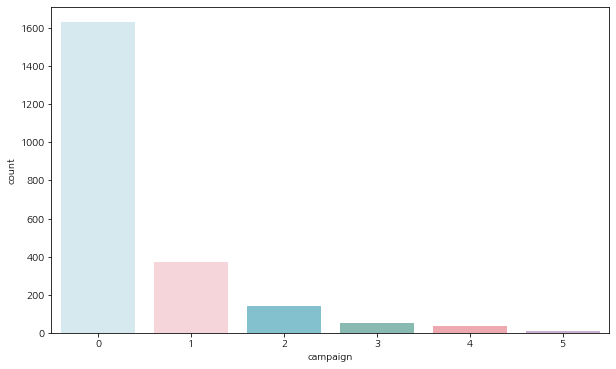

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=eda, x='campaign', palette= pal )
plt.show()

### grade별 분석

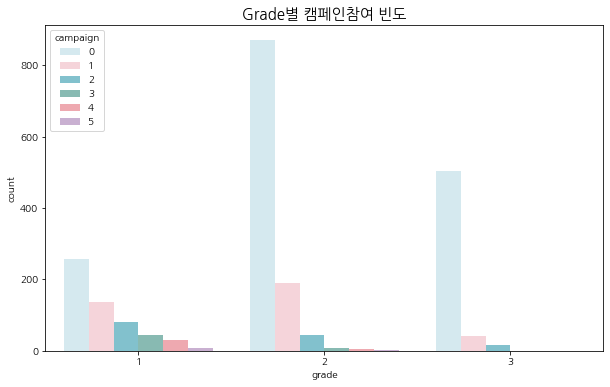

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=eda, x='grade', hue='campaign', palette=pal)
plt.title('Grade별 캠페인참여 빈도', size=15)
plt.show()

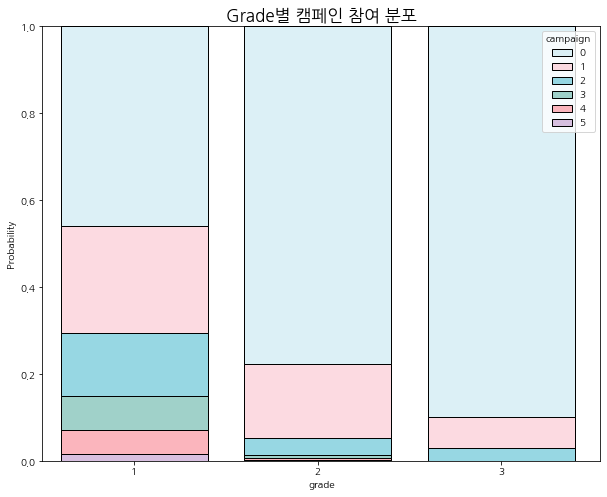

In [ ]:
plt.figure(figsize=(10,8))
plt.rcParams['font.family'] = 'NanumGothic'
sns.histplot(data=eda, x='grade', hue='campaign', multiple='fill',discrete=True, stat='probability', shrink=0.8, palette=pal)
plt.title('Grade별 캠페인 참여 분포', size=17)
plt.xticks([1,2,3])
plt.show()

In [ ]:
pal1 = sns.color_palette('Spectral', 3)

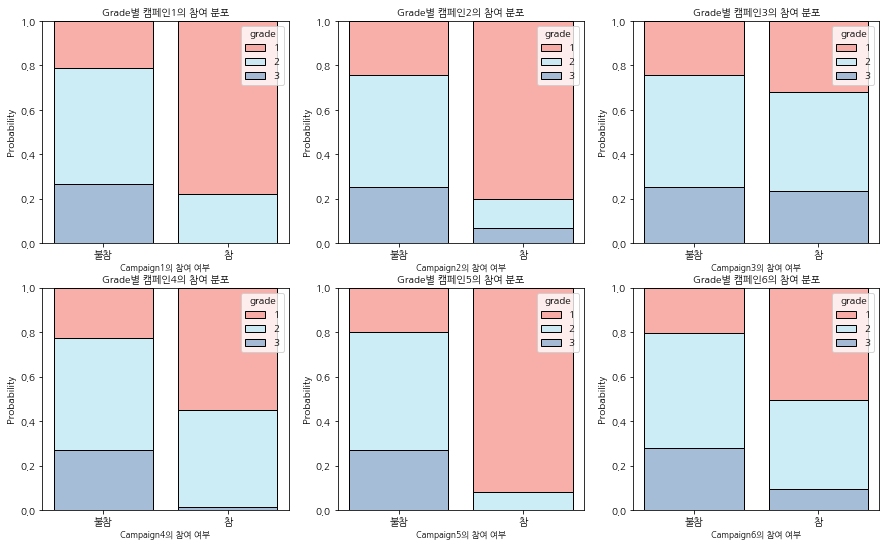

In [ ]:
plt.figure(figsize=(15,9))
plt.rcParams['font.family'] = 'NanumGothic'
plt.subplot(2,3,1)
sns.histplot(data=eda, x='AcceptedCmp1', hue='grade', multiple='fill',discrete=True, stat='probability', shrink=0.8, palette=c1)
plt.title('Grade별 캠페인1의 참여 분포', size=10)
plt.xticks([0,1],['불참','참'])
plt.xlabel('Campaign1의 참여 여부', size=8.5)
plt.subplot(2,3,2)
sns.histplot(data=eda, x='AcceptedCmp2', hue='grade', multiple='fill',discrete=True, stat='probability', shrink=0.8, palette=c1)
plt.title('Grade별 캠페인2의 참여 분포', size=10)
plt.xticks([0,1],['불참','참'])
plt.xlabel('Campaign2의 참여 여부', size=8.5)
plt.subplot(2,3,3)
sns.histplot(data=eda, x='AcceptedCmp3', hue='grade', multiple='fill',discrete=True, stat='probability', shrink=0.8, palette=c1)
plt.title('Grade별 캠페인3의 참여 분포', size=10)
plt.xticks([0,1],['불참','참'])
plt.xlabel('Campaign3의 참여 여부', size=8.5)
plt.subplot(2,3,4)
sns.histplot(data=eda, x='AcceptedCmp4', hue='grade', multiple='fill',discrete=True, stat='probability', shrink=0.8, palette=c1)
plt.title('Grade별 캠페인4의 참여 분포', size=10)
plt.xticks([0,1],['불참','참'])
plt.xlabel('Campaign4의 참여 여부', size=8.5)
plt.subplot(2,3,5)
sns.histplot(data=eda, x='AcceptedCmp5', hue='grade', multiple='fill',discrete=True, stat='probability', shrink=0.8, palette=c1)
plt.title('Grade별 캠페인5의 참여 분포', size=10)
plt.xticks([0,1],['불참','참'])
plt.xlabel('Campaign5의 참여 여부', size=8.5)
plt.subplot(2,3,6)
sns.histplot(data=eda, x='Response', hue='grade', multiple='fill',discrete=True, stat='probability', shrink=0.8, palette=c1)
plt.title('Grade별 캠페인6의 참여 분포', size=10)
plt.xticks([0,1],['불참','참'])
plt.xlabel('Campaign6의 참여 여부', size=8.5)
plt.show()

* grade를 나눈 기준이 단지 소비량이었지만, 높은 등급의 고객의 참여율이 높은 경향을 보였다.
* grade 3의 고객은 discount를 많이 받으므로 catalog에 discount 쿠폰을 첨부해서 나눠준다면 좋을 것 같다.
* 연령대가 높은 고객이 대부분이므로 이들은 web에서 구매하는 것 보다는 catalog나 직접 방문하여 구매가 더 편할 것

### 시기별 마케팅 캠페인 반응 분석

#### **1. grade 별로**

In [ ]:
eda_cmp_mean = eda_g_p[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5','Response']]
eda_cmp_mean = eda_cmp_mean.T
eda_cmp_mean["time"] = ["cmp1","cmp2","cmp3","cmp4","cmp5","cmp6"]

In [ ]:
eda_cmp_mean.iloc[:,0]

AcceptedCmp1    0.200000
AcceptedCmp2    0.042857
AcceptedCmp3    0.092857
AcceptedCmp4    0.164286
AcceptedCmp5    0.267857
Response        0.300000
Name: 0, dtype: float64

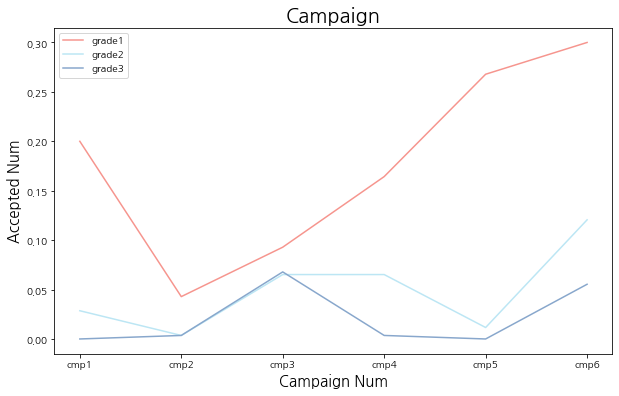

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x='time', y=eda_cmp_mean.iloc[:,0], data=eda_cmp_mean, color=c1[0])
sns.lineplot(x='time', y=eda_cmp_mean.iloc[:,1], data=eda_cmp_mean, color=c1[1])
sns.lineplot(x='time', y=eda_cmp_mean.iloc[:,2], data=eda_cmp_mean, color=c1[2])
plt.legend(['grade1','grade2','grade3'])
plt.xlabel('Campaign Num',size=15)
plt.ylabel('Accepted Num',size=15)
plt.title('Campaign', size=20)
plt.show()

- 1그룹: 초반부터 캠페인 많이 수락. 갈수록 증가
- 2그룹: 결과적으로 response가 늘긴 하지만, 안정적이지 않음.
- 3그룹: 0에서 시작. 3과 비교했을때 response가 늘지 않음.

- 3번째 캠페인, 6번째 캠페인 때 모두 상승 -> 1, 3, 6 기준으로 살펴보기

#### **2. 캠페인 반응 양상 별로** (All accept / 후반에 accept / 초반에만 accept / X)
  - 소비자 반응 유형 분류
  1. 1o 3o 6o : 지속형 (consistent)
  2. 1x 3? 6o : 성장형 (growing)
  3. 1x 3x 6x : 무관심형 (indifferent)
  4. 1o 3? 6x : 이탈형 (churn)

In [ ]:
eda_prchs_a = eda2[(eda2["AcceptedCmp1"]==1) & (eda2["AcceptedCmp3"]==1) & (eda2["Response"]==1)]
eda_prchs_b = eda2[(eda2["AcceptedCmp1"]==0) & (eda2["Response"]==1)]
eda_prchs_c = eda2[(eda2["AcceptedCmp1"]==0) & (eda2["AcceptedCmp3"]==0) & (eda2["Response"]==0)]
eda_prchs_d = eda2[(eda2["AcceptedCmp1"]==1) & (eda2["Response"]==0)]

In [ ]:
eda_prchs_a["CmpClassify"] = "consistent"
eda_prchs_b["CmpClassify"] = "growing"
eda_prchs_c["CmpClassify"] = "indifferent"
eda_prchs_d["CmpClassify"] = "churn"

<ipython-input-111-2015f9f39761>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_prchs_a["CmpClassify"] = "consistent"
<ipython-input-111-2015f9f39761>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_prchs_b["CmpClassify"] = "growing"
<ipython-input-111-2015f9f39761>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [ ]:
eda_cmp = pd.concat([eda_prchs_a, eda_prchs_b, eda_prchs_c, eda_prchs_d])

##### **등급**

<ipython-input-134-acf6ab42e9a2>:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='#666666')


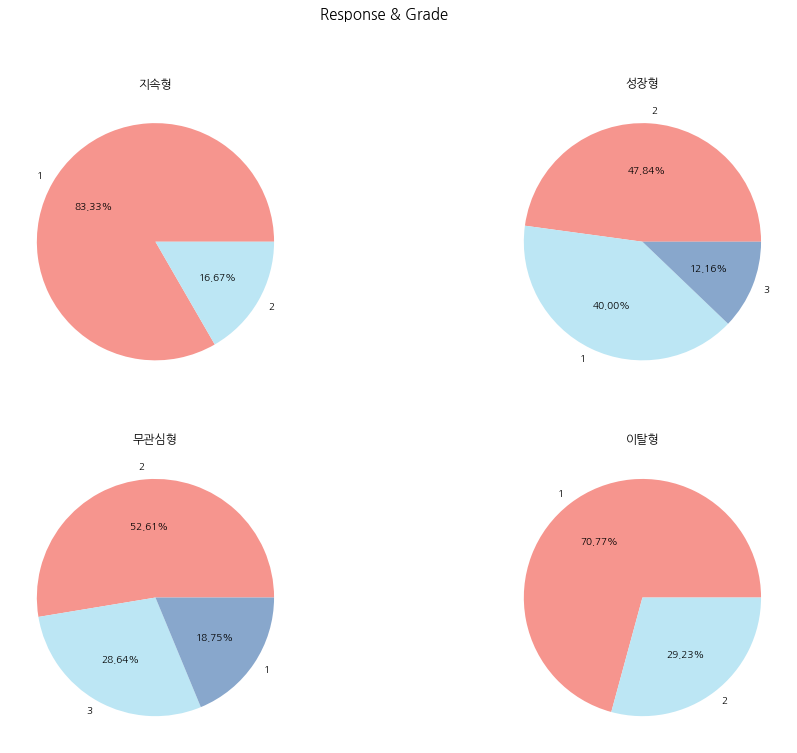

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16,12))
data =  [eda_prchs_a, eda_prchs_b, eda_prchs_c, eda_prchs_d]
title = ["지속형", "성장형", "무관심형", "이탈형"]
plt.rcParams['font.family'] = 'NanumGothic'

for i,ax in enumerate(axes.reshape(-1)): 
    df = data[i].grade.value_counts()
    ax.pie( x = df, labels = df.index, colors=c1, autopct='%.2f%%' )

    ax.set_title(title[i])
    ax.set_facecolor('white')
    ax.grid(b=True, color='#666666')

fig.suptitle('Response & Grade', size = 15)
plt.show()

- consistent & churn : 3등급은 아예 없고, 1등급이 제일 많음. 등급이 높을수록 첫 번째 캠페인부터 관심 있음. 하지만 쉽게 이탈 가능.

##### **자녀 수**

<ipython-input-114-acfe6ee2a024>:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='#666666')


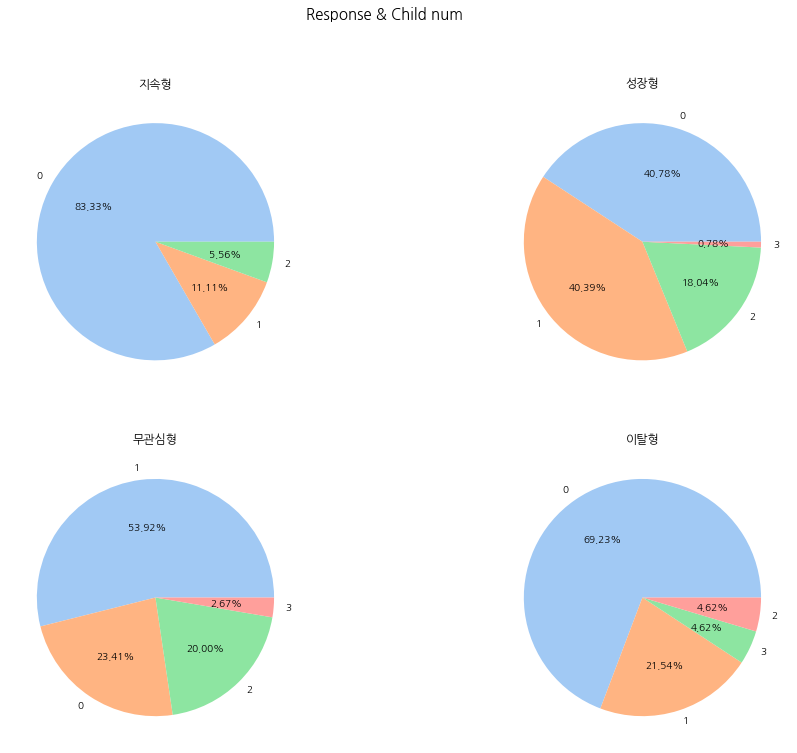

In [ ]:
colors = sns.color_palette('pastel')[0:5]
fig, axes = plt.subplots(2, 2, figsize=(16,12))
data =  [eda_prchs_a, eda_prchs_b, eda_prchs_c, eda_prchs_d]
title = ["지속형", "성장형", "무관심형", "이탈형"]

for i,ax in enumerate(axes.reshape(-1)): 
    df = data[i].children.value_counts()
    ax.pie( x = df, labels = df.index, colors = colors, autopct='%.2f%%' )

    ax.set_title(title[i])
    ax.set_facecolor('white')
    ax.grid(b=True, color='#666666')
    

fig.suptitle('Response & Child num', size = 15)
plt.show()

##### **구매 경로**

In [ ]:
eda_cmp_p = eda_cmp.groupby("CmpClassify").mean()[["DealsPurchases","CatalogPurchases","WebPurchases","StorePurchases"]]

In [ ]:
eda_cmp_p = eda_cmp_p.T

In [ ]:
eda_cmp_p.index

Index(['DealsPurchases', 'CatalogPurchases', 'WebPurchases', 'StorePurchases'], dtype='object')

<ipython-input-159-d0a02110b41a>:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='#666666')
<ipython-input-159-d0a02110b41a>:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='#666666')
<ipython-input-159-d0a02110b41a>:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='#666666')
<ipython-input-159-d0a02110b41a>:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='#666666')


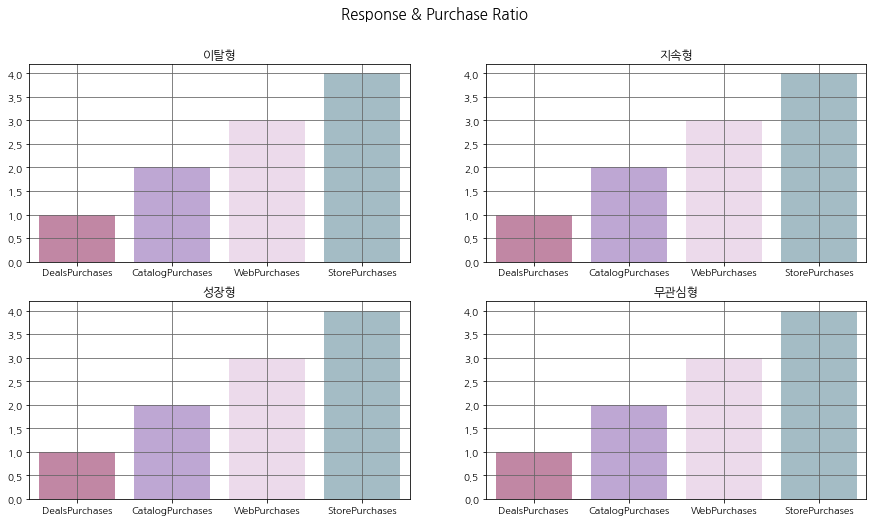

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15,8))
c = ["이탈형", "지속형", "성장형", "무관심형"]

for i,ax in enumerate(axes.reshape(-1)): 

    sns.barplot(ax=ax, data = eda_cmp_p, x= eda_cmp_p.index,y=[1,2,3,4] ,palette=ce)
    ax.set_title(c[i])
    ax.set_facecolor('white')
    ax.grid(b=True, color='#666666')

fig.suptitle('Response & Purchase Ratio', size = 15)
plt.show()

- churn & consistent : 둘 다 첫 번째 캠페인 수락. churn은 consistent과 달리 catalog의 비율이 적음.
  - ▶ 이탈 고객에게 지속적인 반응을 얻기 위해서는 카탈로그 활용!
- growing & indifferent : 둘 다 첫 번째 캠페인 거절. indifferent은 growing과 달리 catalog의 비율이 적음.
  - ▶ 역시나 고객의 관심을 끌기 위해서는 카탈로그 활용!
- consistent & growing : 둘다 store 구매가 0.35 프로 아래인 반면, churn & indifferent는 store 구매가 0.4 프로 이상임.
  - ▶ 최종적인 캠페인 반응을 얻기 위해서는 전통적인 매장 구매 외에도 다양한 경로 활성화!

### 제품군별 소비량의 campaign 참여율

In [ ]:
eda_temp = eda.copy()
name = eda_temp.columns[9:15]
name

Index(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds'],
      dtype='object')

In [ ]:
for col in name:
    eda_temp[col] = pd.qcut(eda[col], [0, .2, .4, .6, .8, 1], labels=['5th', '4th', '3rd', '2nd', '1st'])
eda_temp[name]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1st,1st,1st,1st,1st,1st
12,3rd,1st,1st,1st,1st,3rd
15,1st,2nd,2nd,2nd,1st,2nd
18,1st,1st,1st,5th,2nd,1st
21,5th,5th,1st,5th,5th,5th
...,...,...,...,...,...,...
2223,4th,3rd,5th,5th,4th,5th
2229,5th,4th,5th,3rd,5th,4th
2232,5th,5th,5th,4th,4th,5th
2233,5th,3rd,4th,3rd,5th,4th


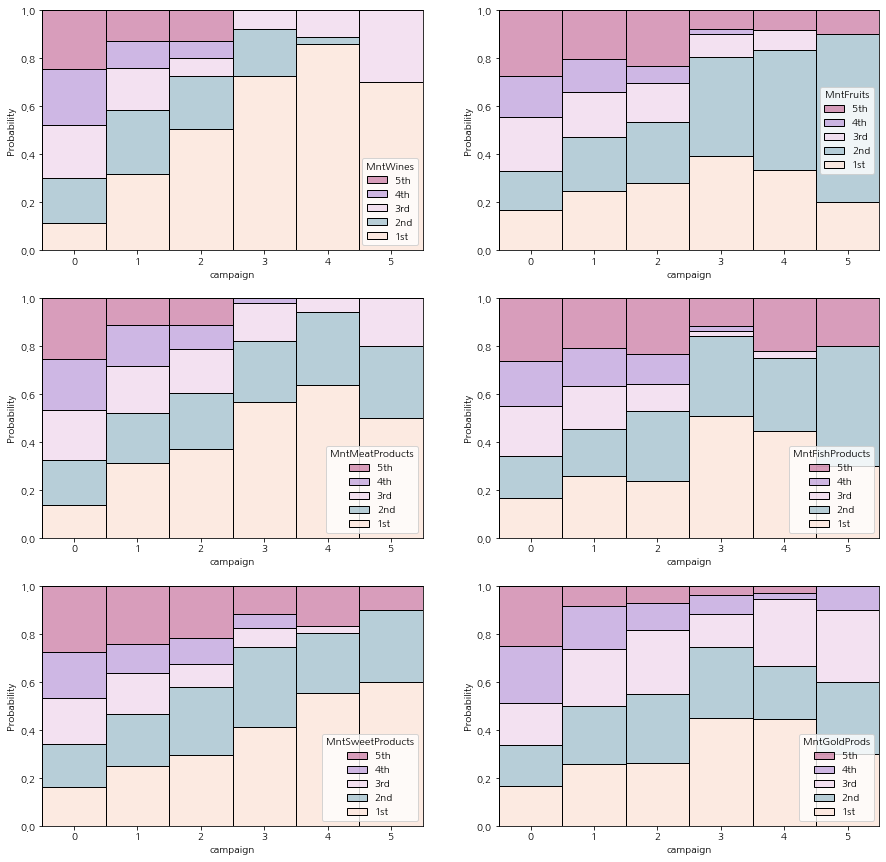

In [ ]:
plt.figure(figsize=(15,15))
for i, col in enumerate(name):
    plt.subplot(3,2,i+1)
    sns.histplot(data = eda_temp, x= 'campaign', discrete = True, hue = col, stat='probability', multiple='fill', palette=c3)
plt.show()

> Campaign 반응 횟수마다 제품군별 소비량의 변화를 보는 그래프로 Wine과 MeatProduct의 경우 campaign 반응이 많을수록 구매량이 많은 소비자들의 수가 증가하는 반면 Fruit에는 그런 효과가 미미하다고 생각합니다. Campaign 반응이 높은 사람을 타겟한다면 Wine 소비량이 많은 사람을 타겟하는 것이 효율적이라고 생각합니다.

### Grade와 Response

In [ ]:
eda_edu = eda1.groupby(['grade','Education'])['Response'].agg({response_rate}).unstack()
eda_edu.columns = eda_edu.columns.droplevel(level=0)
eda_edu.fillna(value=0,inplace=True)
eda_edu

Education,2n Cycle,Basic,Graduation,Master,PhD
grade,,,,,
1,26.8293,0.0000,27.9310,31.7073,34.5070
2,9.3750,5.0000,9.9099,12.4378,19.0678
3,3.1746,2.9412,5.9041,6.0976,6.7961


In [ ]:
eda_mar = eda1.groupby(['grade','Marital_Status'])['Response'].agg(response_rate).unstack()
eda_mar.fillna(value=0,inplace=True)
eda_mar

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
grade,,,,,,,,
1,50.0,0.0,44.2623,23.6181,42.8571,21.2766,30.7692,0.0
2,0.0,0.0,16.3462,8.4282,20.1717,7.9310,26.3158,50.0
3,0.0,100.0,5.9701,6.3927,4.4643,4.9296,0.0000,0.0


In [ ]:
eda_kid = eda1.groupby(['grade','Kidhome'])['Response'].agg(response_rate).unstack()
eda_kid.fillna(value=0,inplace=True)
eda_kid

Kidhome,0,1,2
grade,,,
1,30.9021,17.6471,0.0000
2,8.7879,17.5644,9.5238
3,1.9608,6.8075,0.0000


#### Grade별 자녀 수에 따른 Response

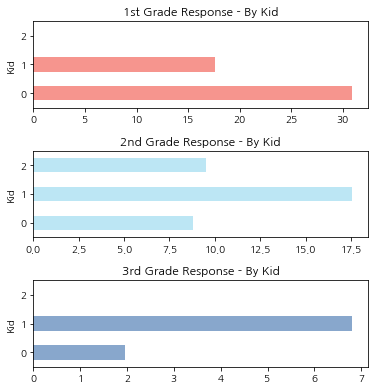

In [ ]:
eda_kid1  = eda_kid.loc[1]
eda_kid2 = eda_kid.loc[2]
eda_kid3 = eda_kid.loc[3]
plt.subplot(3, 1, 1) 
eda_kid1.plot(kind = "barh",title='1st Grade Response - By Kid',stacked=True,
              xlabel='Kid',ylabel='Response', color=c1[0])
plt.subplot(3, 1, 2) 
eda_kid2.plot(kind = "barh",title='2nd Grade Response - By Kid',stacked=True,
              xlabel='Kid',ylabel='Response',color=c1[1])
plt.subplot(3, 1, 3) 
eda_kid3.plot(kind = "barh",title='3rd Grade Response - By Kid',stacked=True,
              xlabel='Kid',ylabel='Response', color=c1[2])
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=1.3, wspace=0.5, hspace=0.5) 
plt.show()

결론 : 2등급과 3등급 고객 중에서는 자녀가 1명 있는 고객들의 반응이 제일 높았고 1등급 고객중에서는 자녀가 없는 고객들의 반응이 제일 높았다.
> 2,3등급 고객 중 자녀가 1명 있는 고객들을 타겟으로 한 마케팅을 하면 1등급 고객으로 될 가능성이 있다.

In [ ]:
eda_teen = eda1.groupby(['grade','Teenhome'])['Response'].agg(response_rate).unstack()
eda_teen

Teenhome,0,1,2
grade,,,
1,35.8247,15.7233,37.5000
2,16.2844,9.7027,6.0606
3,8.0495,2.2727,0.0000


In [ ]:
eda_acc = eda1.groupby(['grade','AcceptedCmp5'])['Response'].agg(response_rate).unstack()
eda_acc.fillna(value=0,inplace=True)
eda_acc

AcceptedCmp5,0,1
grade,,
1,20.6897,55.7047
2,11.5982,61.5385
3,5.6058,0.0000


#### 최근 캠페인과 Response와의 연관성

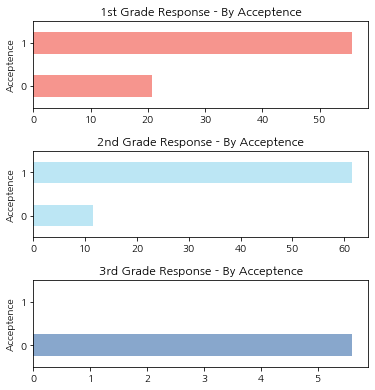

In [ ]:
eda_acc1 = eda_acc.loc[1]
eda_acc2 = eda_acc.loc[2]
eda_acc3 = eda_acc.loc[3]
plt.subplot(3, 1, 1) 
eda_acc1.plot(kind = "barh",title='1st Grade Response - By Acceptence',stacked=True,
              xlabel='Acceptence',ylabel='Response', color=c1[0])
plt.subplot(3, 1, 2) 
eda_acc2.plot(kind = "barh",title='2nd Grade Response - By Acceptence',stacked=True,
              xlabel='Acceptence',ylabel='Response',color=c1[1])
plt.subplot(3, 1, 3) 
eda_acc3.plot(kind = "barh",title='3rd Grade Response - By Acceptence',stacked=True,
              xlabel='Acceptence',ylabel='Response',color=c1[2])
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=1.3, wspace=0.5, hspace=0.5) 
plt.show()

* 1등급,2등급 고객들 중 최근 캠패인에 참여한 고객일 수록 반응률이 높았다. 하지만 3등급 고객들은 최근 캠패인에 참여한 고객이 없었다.
* 이를 통해 기존 고객들 관리 또한 중요함을 알 수 있으며, 3등급 고객들이 캠페인에 흥미를 느낄 수 있도록 이벤트를 준비하는 것도 좋은 방안이라고 생각한다.

In [ ]:
eda_complain = eda1.groupby(['grade','Complain'])['Response'].agg(response_rate).sort_values(ascending = False).unstack()

eda_complain

Complain,0,1
grade,,
1,30.0181,50.0
2,12.1129,20.0
3,5.6985,0.0


#### Grade별 Complain 여부에 따른 Response

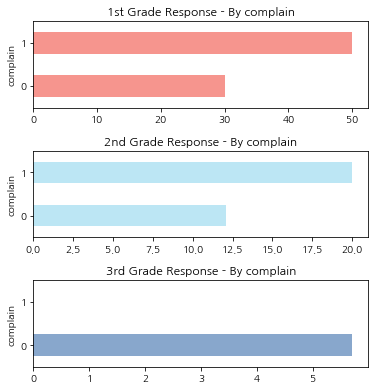

In [ ]:
eda_complain1 = eda_complain.loc[1]
eda_complain2 = eda_complain.loc[2]
eda_complain3 = eda_complain.loc[3]
plt.subplot(3, 1, 1) 
eda_complain1.plot(kind = "barh",title='1st Grade Response - By complain',stacked=True,
                   xlabel='complain',ylabel='Response', color=c1[0])
plt.subplot(3, 1, 2) 
eda_complain2.plot(kind = "barh",title='2nd Grade Response - By complain',stacked=True,
                   xlabel='complain',ylabel='Response', color=c1[1])
plt.subplot(3, 1, 3) 
eda_complain3.plot(kind = "barh",title='3rd Grade Response - By complain',stacked=True,
                   xlabel='complain',ylabel='Response', color=c1[2])
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=1.3, wspace=0.5, hspace=0.5) 
plt.show()

> 1등급,2등급 고객들은 complain을 한 경험이 있을수록 반응률이 높았다. 이에 반해 3등급 고객들은 complain한 경험이 없는 사람밖에 없었다. 이를 통해서 complain 또한 관심 표현의 일종이라고 생각할 수 있으며 고객들의 complain을 적극 반영해야한다.

## 결론

- 소비자 등급 올리기
  - targeting
    - 자녀 수
      - 2,3 -> 1 : 자녀가 있는 가정을 위한 마케팅
  - 구매경로
    - 3등급 -> 2등급 : website 개선
    - 2 -> 1 : 카탈로그 활용
  - 캠페인 반응
    - 시기별 반응: 
    - 연령 : 어릴수록 반응 잘함 => 어린 사람들을 위한 캠페인





- 전체 특성
 - income 많을수록 spent 많음, 카탈로그 구매율 많음
 - 혼자 사는 사람일수록 캠페인 많이 참여, 와인 구매율 많음, 구매 많음
 - 
- 캠페인 개선책
  - 연령 : 어릴수록 캠페인 반응 잘함, 웹구매율 높음 => 웹사이트에 어린 사람들을 위한 캠페인
  - 소비자 반응 유형
    - churn & consistent : 둘 다 첫 번째 캠페인 수락. churn은 consistent과 달리 catalog의 비율이 적음.
     - ▶ 이탈 고객에게 지속적인 반응을 얻기 위해서는 카탈로그 활용!
    - growing & indifferent : 둘 다 첫 번째 캠페인 거절. indifferent은 growing과 달리 catalog의 비율이 적음.
     - ▶ 역시나 고객의 관심을 끌기 위해서는 카탈로그 활용!
    - consistent & growing : 둘다 store 구매가 0.35 프로 아래인 반면, churn & indifferent는 store 구매가 0.4 프로 이상임.
     - ▶ 최종적인 캠페인 반응을 얻기 위해서는 전통적인 매장 구매 외에도 다양한 경로 활성화!

- 3등급
  - web 방문 수 제일 많음 but web 구매율 제일 적음 -> website 개선(구매 절차 간단하게, 신선 제품은 직접 가서 사는 경우가 많을 것..-> web구매로도 신선도 유지할 수 있는 방안 마련(배달 빠르게..?), website에 할인 관련 문구 많이 활용)
  - store, deals 구매율 제일 많음 -> website에 할인 관련 문구 많이 활용
  - 자녀 1명인 가정이 캠페인 참여 많이 함
  - 

- 2등급
  - 자녀 1명인 가정이 캠페인 참여 많이 함
  - 자녀 있음
  - 
  - 


- 1등급
  - 자녀 없음
  - 캠페인 많이 참여 
  - 와인 많이 삼 -> 와인을 활용한 마케팅 (혼자 사는 사람을 위한...?) 
  - 카탈로그 많이 활용 -> 와인 장수 늘리기, 혼자 사는 사람을 위한 문구
  - 컴플레인 적다
  - 지속형, 이탈형 많음

  - 

- 2,3등급
  - 카탈로그 활용 적음 -> 카탈로그에 할인 쿠폰
  - 자녀를 위한 마케팅 ->  store 구매율 많기 때문에 store 내에 다자녀를 위한 시설 마련 + 특히 자녀 1명인 가정을 위한 카탈로그 배포 
  - 

